## Task 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

In [3]:
shape = 3.0     # Параметр формы гамма-распределения (a)
scale = 2.0     # Параметр масштаба гамма-распределения (theta)
n = 1000        # Размер одной выборки
M = 2000        # Количество повторений

means = []
vars_ = []
medians = []
U1_values = []
U2_values = []

In [4]:
theoretical_mean = shape * scale
theoretical_var = shape * (scale**2)

for _ in range(M):
    sample = gamma.rvs(a=shape, scale=scale, size=n)

    x_bar = np.mean(sample)
    s2 = np.var(sample, ddof=1)
    med = np.median(sample)

    means.append(x_bar)
    vars_.append(s2)
    medians.append(med)

    sorted_sample = np.sort(sample)
    X_2 = sorted_sample[1]
    X_n = sorted_sample[-1]

    F_X2 = gamma.cdf(X_2, a=shape, scale=scale)
    F_Xn = gamma.cdf(X_n, a=shape, scale=scale)

    U1 = n * F_X2
    U2 = n * (1 - F_Xn)

    U1_values.append(U1)
    U2_values.append(U2)

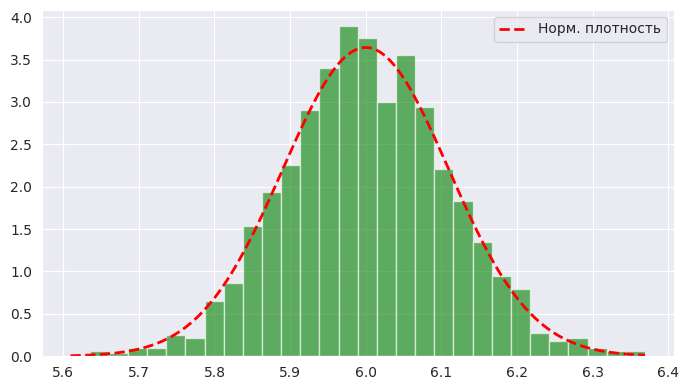

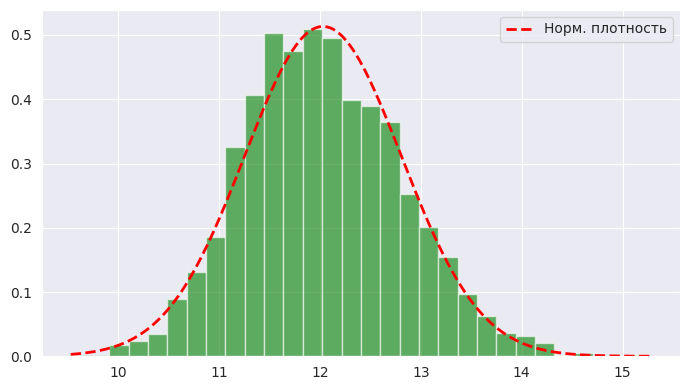

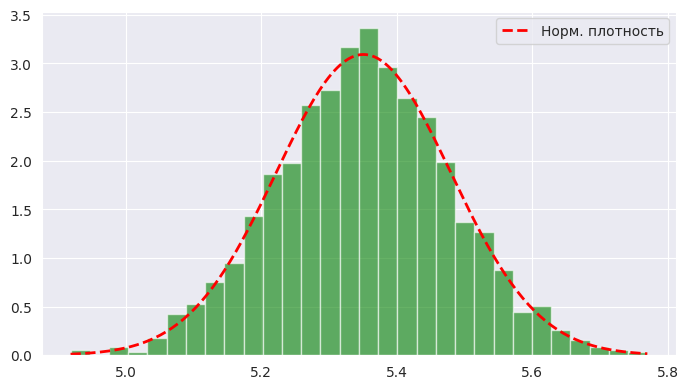

In [5]:
def plot_hist_with_normal(data, title, true_mean=None, true_var=None):
    plt.figure(figsize=(7, 4))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

    mu = np.mean(data) if true_mean is None else true_mean
    sigma = np.sqrt(np.var(data)) if true_var is None else np.sqrt(true_var)

    x_vals = np.linspace(min(data), max(data), 200)
    pdf_vals = norm.pdf(x_vals, loc=mu, scale=sigma)

    plt.plot(x_vals, pdf_vals, 'r--', linewidth=2, label='Норм. плотность')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_hist_with_normal(
    means,
    title='',
    true_mean=theoretical_mean,
    true_var=theoretical_var / n
)

plot_hist_with_normal(
    vars_,
    title=''
)

plot_hist_with_normal(
    medians,
    title=''
)

In [6]:
mean_of_means = np.mean(means)        # мат. ожидание оценок среднего
var_of_means = np.var(means, ddof=1) # дисперсия оценок среднего
med_of_means = np.median(means)      # медиана оценок среднего

mean_of_vars = np.mean(vars_)
var_of_vars = np.var(vars_, ddof=1) # дисперсия самих выборочных дисперсий
med_of_vars = np.median(vars_)

mean_of_meds = np.mean(medians)      # среднее по медианам
var_of_meds = np.var(medians, ddof=1)
med_of_meds = np.median(medians)

# Затем можно вывести их на экран или сохранить в переменные
print("Среднее X:", mean_of_means)
print("Дисперсия X:", var_of_means)
print("Медиана X:", med_of_means)

print("Среднее S:", mean_of_vars)
print("Дисперсия S:", var_of_vars)
print("Медиана S:", med_of_vars)

print("Среднее med:", mean_of_meds)
print("Дисперсия med:", var_of_meds)
print("Медиана med:", med_of_meds)

Среднее X: 6.002393233917331
Дисперсия X: 0.011822174840932958
Медиана X: 5.999153722367677
Среднее S: 12.03082472323989
Дисперсия S: 0.6043508943556012
Медиана S: 11.987450915106878
Среднее med: 5.35087528815302
Дисперсия med: 0.01664878531499534
Медиана med: 5.352815790021195


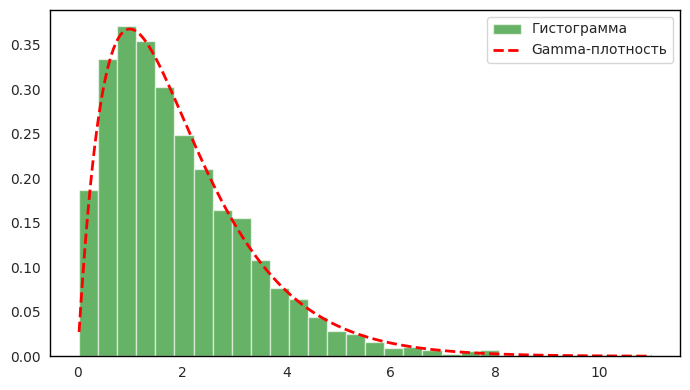

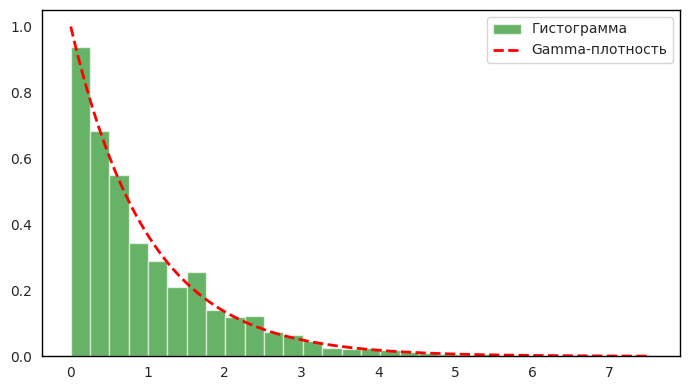

In [27]:
# Проверка U1 -> Gamma(2,1) и U2 -> Gamma(1,1) = Exp(1)
def plot_hist_with_gamma(data, shape_g, scale_g, title):
    plt.figure(figsize=(7, 4))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма')

    x_vals = np.linspace(min(data), max(data), 300)
    pdf_vals = gamma.pdf(x_vals, a=shape_g, scale=scale_g)

    plt.plot(x_vals, pdf_vals, 'r--', linewidth=2, label='Gamma-плотность')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# По условию: U1 = n F(X_(2)) -> Gamma(2,1), U2 = n(1-F(X_(n))) -> Gamma(1,1)=Exp(1)
plot_hist_with_gamma(U1_values, shape_g=2, scale_g=1, title='')
plot_hist_with_gamma(U2_values, shape_g=1, scale_g=1, title='')

In [8]:
print(gamma.ppf(0.5, a=3, scale=2))

5.348120627447118


# Task 2

In [21]:
import pandas as pd
import seaborn as sns

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']   = 'white'
plt.rcParams['axes.edgecolor']   = 'black'
plt.rcParams['axes.linewidth']   = 1.0

df = pd.read_csv("cars93.csv")

In [10]:
types_counts = df['Type'].value_counts()
print("Какие типы автомобилей представлены и их количество:")
print(types_counts)

# Наиболее распространённый тип
most_common_type = types_counts.idxmax()
least_common_type = types_counts.idxmin()
print(f"Наиболее распространённый тип: {most_common_type}")
print(f"Наименее распространённый тип: {least_common_type}")

Какие типы автомобилей представлены и их количество:
Type
Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: count, dtype: int64
Наиболее распространённый тип: Midsize
Наименее распространённый тип: Van


In [11]:
all_hp = df['Horsepower'].dropna()
mean_all = np.mean(all_hp)
var_all = np.var(all_hp, ddof=1)
median_all = np.median(all_hp)
iqr_all = np.quantile(all_hp, 0.75) - np.quantile(all_hp, 0.25)

print(f"\nСтатистики для всей совокупности (Horsepower):")
print(f"Выборочное среднее: {mean_all:.2f}")
print(f"Выборочная дисперсия: {var_all:.2f}")
print(f"Выборочная медиана: {median_all:.2f}")
print(f"Межквартильный размах (IQR): {iqr_all:.2f}")


Статистики для всей совокупности (Horsepower):
Выборочное среднее: 143.83
Выборочная дисперсия: 2743.08
Выборочная медиана: 140.00
Межквартильный размах (IQR): 67.00


In [12]:
grouped = df.groupby('Type')['Horsepower']

stats_by_type = grouped.agg(
    mean='mean',
    var='var',
    median='median',
    Q1=lambda x: np.quantile(x.dropna(), 0.25),
    Q3=lambda x: np.quantile(x.dropna(), 0.75)
)
stats_by_type['IQR'] = stats_by_type['Q3'] - stats_by_type['Q1']
stats_by_type = stats_by_type.drop(columns=['Q1','Q3'])

print("\nСтатистики п   о каждому типу (Horsepower):")
print(stats_by_type)


Статистики по каждому типу (Horsepower):
               mean          var  median    IQR
Type                                           
Compact  131.000000   518.533333   132.0  33.25
Large    179.454545   477.072727   170.0  25.00
Midsize  173.090909  2756.086580   169.0  69.00
Small     91.000000   447.600000    90.0  21.00
Sporty   160.142857  5536.285714   147.5  72.25
Van      149.444444   370.277778   151.0  23.00


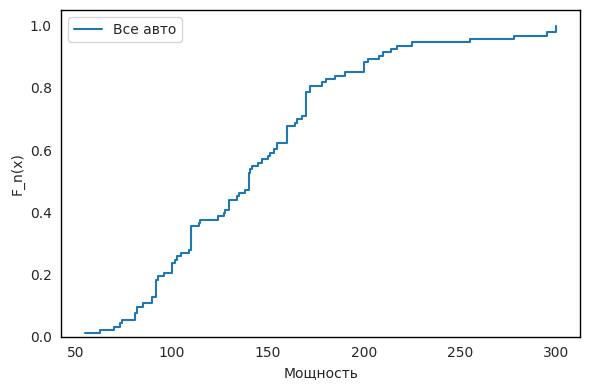

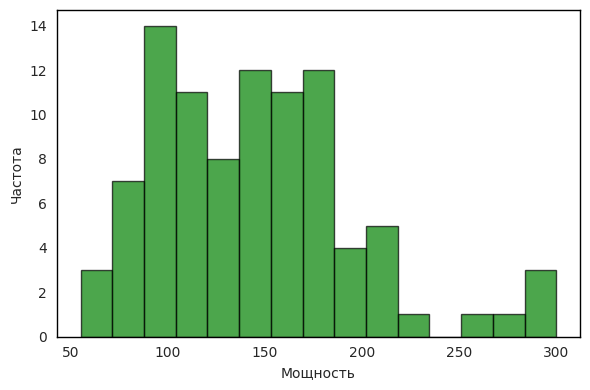

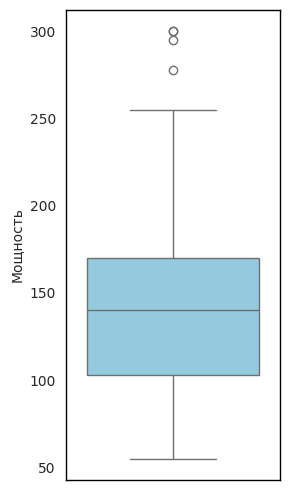

In [22]:
def plot_ecdf(data, label='ECDF'):
    sorted_data = np.sort(data)
    n = len(sorted_data)
    y = np.arange(1, n+1) / n  # значения от 1/n до 1
    plt.step(sorted_data, y, where='post', label=label)
    plt.xlabel('Мощность')
    plt.ylabel('F_n(x)')
    plt.ylim([0,1.05])

plt.figure(figsize=(6,4))
plot_ecdf(all_hp, label='Все авто')
# plt.title('Эмпирическая функция распределения (все авто)')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.hist(all_hp, bins=15, alpha=0.7, color='g', edgecolor='black')
# plt.title('Гистограмма мощности (все авто)')
plt.xlabel('Мощность')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

plt.figure(figsize=(3,5))
sns.boxplot(y=all_hp, color='skyblue')
# plt.title('Box-plot мощности (все авто)')
plt.ylabel('Мощность')
plt.tight_layout()
plt.show()

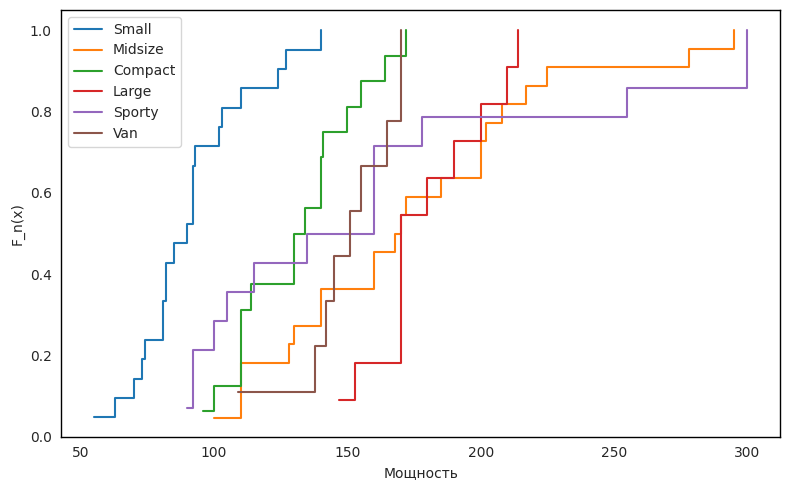

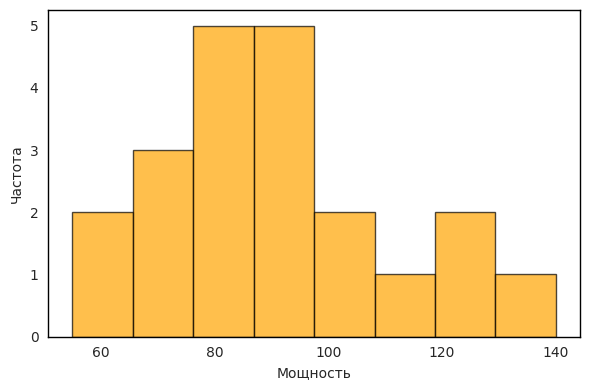

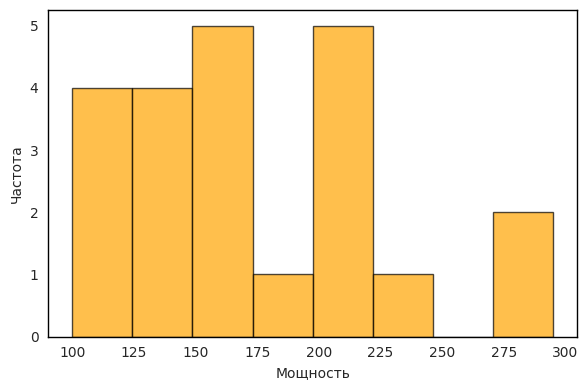

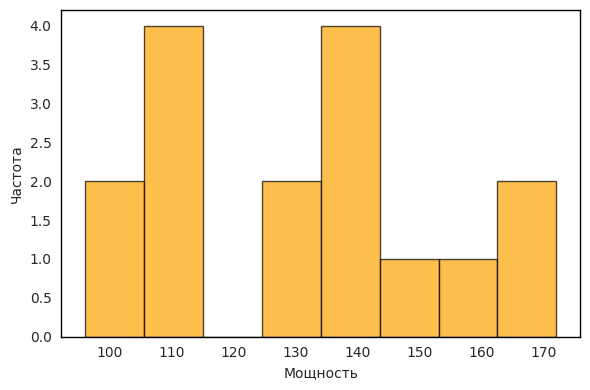

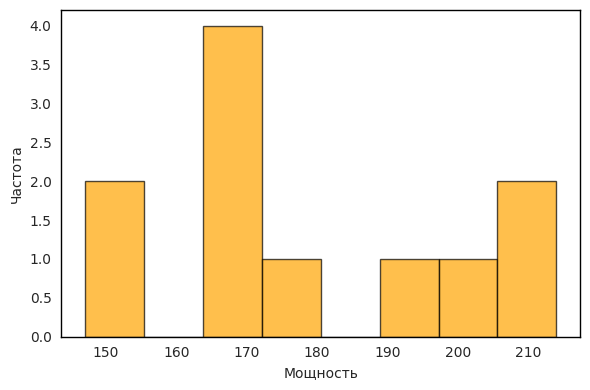

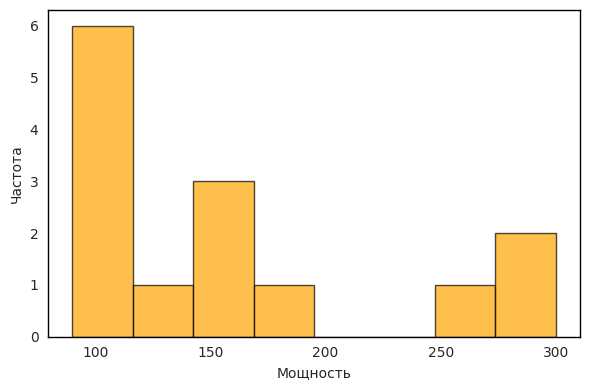

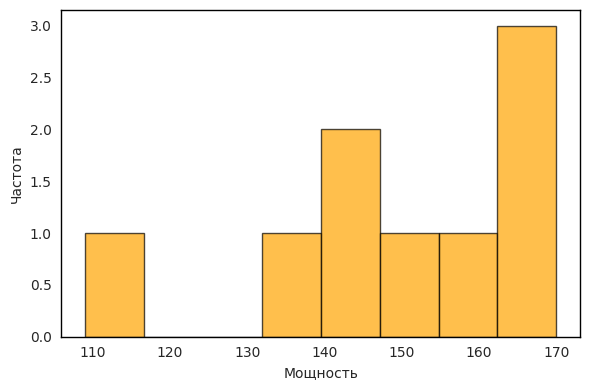

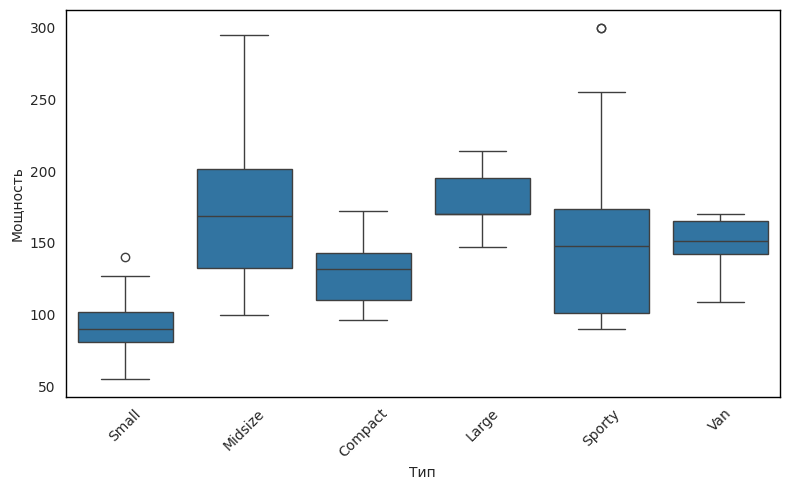

In [23]:
types_unique = df['Type'].unique()

plt.figure(figsize=(8,5))
for t in types_unique:
    subset = df[df['Type'] == t]['Horsepower'].dropna()
    sorted_subset = np.sort(subset)
    n = len(sorted_subset)
    y = np.arange(1, n+1) / n
    plt.step(sorted_subset, y, where='post', label=str(t))
plt.xlabel('Мощность')
plt.ylabel('F_n(x)')
# plt.title('Эмпирическая функция по типам авто')
plt.ylim([0,1.05])
plt.legend()
plt.tight_layout()
plt.show()

for t in types_unique:
    # Отбираем данные по текущему типу
    subset = df[df['Type'] == t]['Horsepower'].dropna()

    # Создаём новую фигуру
    plt.figure(figsize=(6,4))

    # Строим гистограмму
    plt.hist(subset, bins=8, alpha=0.7, color='orange', edgecolor='black')
    # plt.title(f'Гистограмма мощности: {t}')
    plt.xlabel('Мощность')
    plt.ylabel('Частота')

    # Уплотняем расположение и показываем график
    plt.tight_layout()
    plt.show()
    # print(f"images/hist_{t}.png")

plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Horsepower', data=df)
# plt.title('Box-plot Мощность по типам')
plt.xticks(rotation=45)
plt.xlabel('Тип')
plt.ylabel('Мощность')
plt.tight_layout()
plt.show()
# plt.savefig('images/boxplot_types.png')